#**Iman Noor**
###**Email: imannoor2002@gmail.com**

#**🏠 House Price Prediction**

##**Features**
- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass:** The building class
- **MSZoning:** The general zoning classification
- **LotFrontage:** Linear feet of street connected to property
- **LotArea:** Lot size in square feet
- **Street:** Type of road access
- **Alley:** Type of alley access
- **LotShape:** General shape of property
- **LandContour:** Flatness of the property
- **Utilities:** Type of utilities available
- **LotConfig:** Lot configuration
- **LandSlope:** Slope of property
- **Neighborhood:** Physical locations within Ames city limits
- **Condition1:** Proximity to main road or railroad
- **Condition2:** Proximity to main road or railroad (if a second is present)
- **BldgType:** Type of dwelling
- **HouseStyle:** Style of dwelling
- **OverallQual:** Overall material and finish quality
- **OverallCond:** Overall condition rating
- **YearBuilt:** Original construction date
- **YearRemodAdd:** Remodel date
- **RoofStyle:** Type of roof
- **RoofMatl:** Roof material
- **Exterior1st:** Exterior covering on house
- **Exterior2nd:** Exterior covering on house (if more than one material)
- **MasVnrType:** Masonry veneer type
- **MasVnrArea:** Masonry veneer area in square feet
- **ExterQual:** Exterior material quality
- **ExterCond:** Present condition of the material on the exterior
- **Foundation:** Type of foundation
- **BsmtQual:** Height of the basement
- **BsmtCond:** General condition of the basement
- **BsmtExposure:** Walkout or garden level basement walls
- **BsmtFinType1:** Quality of basement finished area
- **BsmtFinSF1:** Type 1 finished square feet
- **BsmtFinType2:** Quality of second finished area (if present)
- **BsmtFinSF2:** Type 2 finished square feet
- **BsmtUnfSF:** Unfinished square feet of basement area
- **TotalBsmtSF:** Total square feet of basement area
- **Heating:** Type of heating
- **HeatingQC:** Heating quality and condition
- **CentralAir:** Central air conditioning
- **Electrical:** Electrical system
- **1stFlrSF:** First Floor square feet
- **2ndFlrSF:** Second floor square feet
- **LowQualFinSF:** Low quality finished square feet (all floors)
- **GrLivArea:** Above grade (ground) living area square feet
- **BsmtFullBath:** Basement full bathrooms
- **BsmtHalfBath:** Basement half bathrooms
- **FullBath:** Full bathrooms above grade
- **HalfBath:** Half baths above grade
- **Bedroom:** Number of bedrooms above basement level
- **Kitchen:** Number of kitchens
- **KitchenQual:** Kitchen quality
- **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
- **Functional:** Home functionality rating
- **Fireplaces:** Number of fireplaces
- **FireplaceQu:** Fireplace quality
- **GarageType:** Garage location
- **GarageYrBlt:** Year garage was built
- **GarageFinish:** Interior finish of the garage
- **GarageCars:** Size of garage in car capacity
- **GarageArea:** Size of garage in square feet
- **GarageQual:** Garage quality
- **GarageCond:** Garage condition
- **PavedDrive:** Paved driveway
- **WoodDeckSF:** Wood deck area in square feet
- **OpenPorchSF:** Open porch area in square feet
- **EnclosedPorch:** Enclosed porch area in square feet
- **3SsnPorch:** Three season porch area in square feet
- **ScreenPorch:** Screen porch area in square feet
- **PoolArea:** Pool area in square feet
- **PoolQC:** Pool quality
- **Fence:** Fence quality
- **MiscFeature:** Miscellaneous feature not covered in other categories
- **MiscVal:** $Value of miscellaneous feature
- **MoSold:** Month Sold
- **YrSold:** Year Sold
- **SaleType:** Type of sale
- **SaleCondition:** Condition of sale

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


##**Preparing the tools**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import xgboost as XGB

%matplotlib inline

from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import GridSearchCV

##**Load the data**

In [ ]:
train_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
train_csv.shape, test_csv.shape

((1460, 81), (1459, 80))

##**Data Acquisition**

In [ ]:
train_csv.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_csv.set_index('Id', inplace=True)
train_csv.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
test_csv.set_index('Id', inplace=True)
test_csv.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [ ]:
train_csv.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
test_csv.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


##**Data Preprocessing and Exploratory Data Analysis (EDA)**

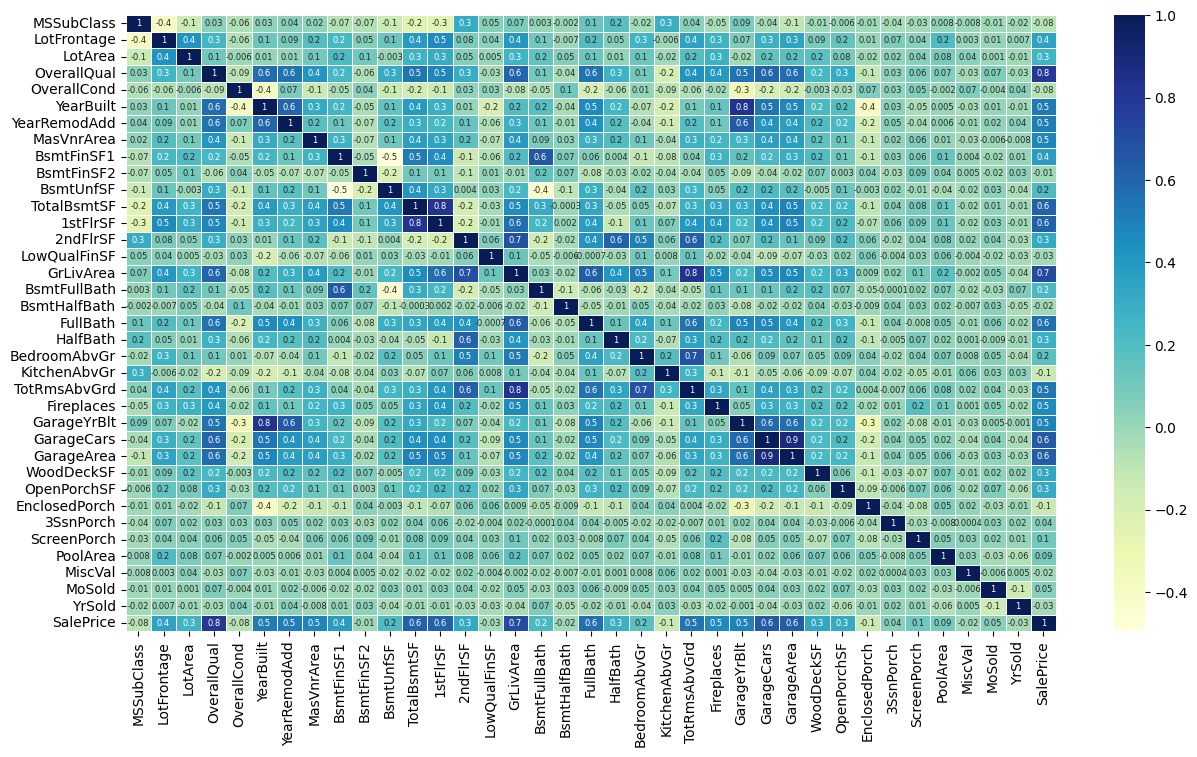

In [ ]:
df1 = train_csv.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15, 8))
dataplot1 = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True, fmt='.1g', linewidths=.5, annot_kws={'size': 6})

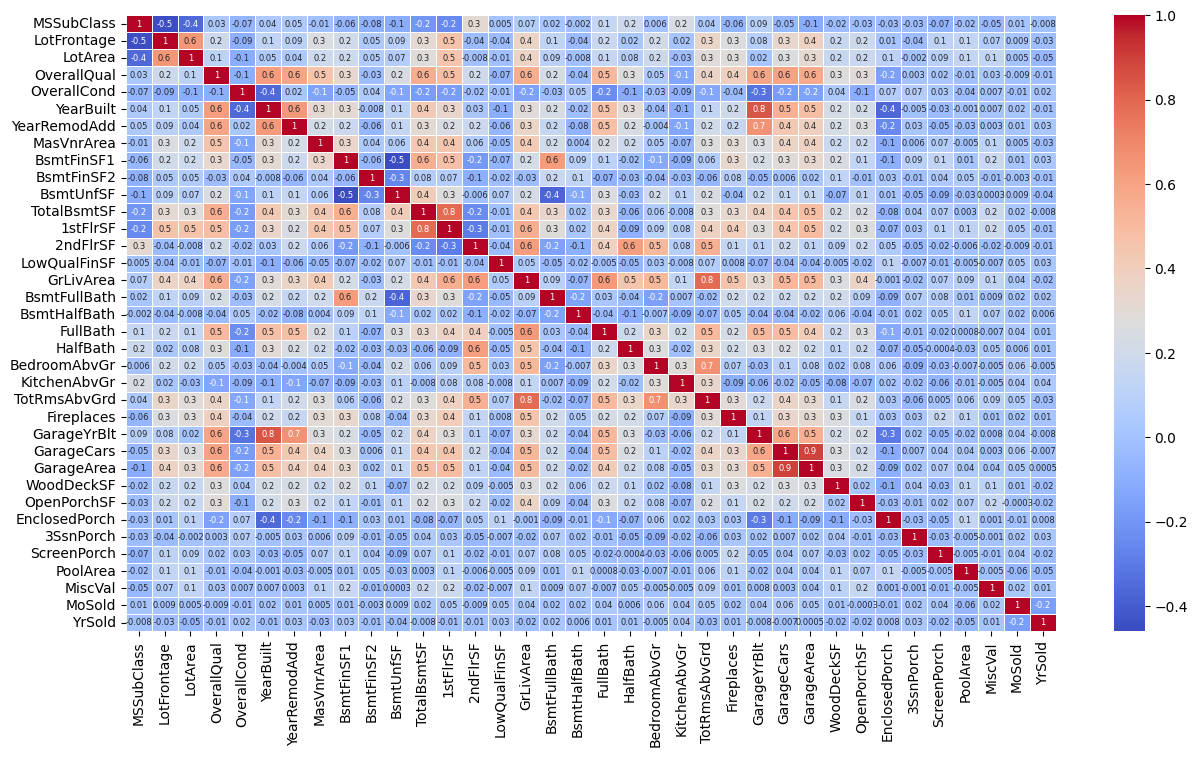

In [ ]:
df2 = test_csv.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15, 8))
dataplot2 = sns.heatmap(df2.corr(), cmap='coolwarm', annot=True, linewidths=.5, fmt='.1g', annot_kws={'size': 6})

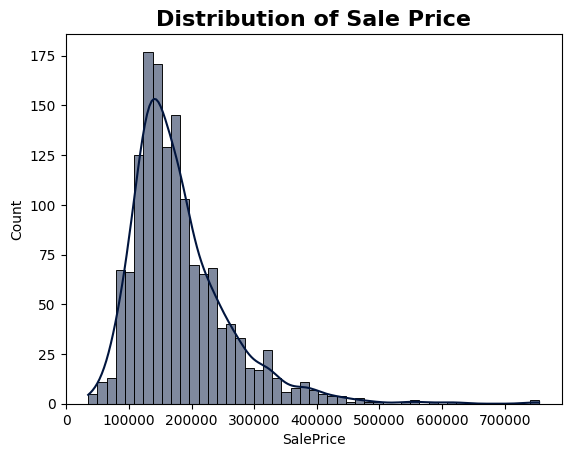

In [ ]:
plt.title("Distribution of Sale Price", weight='bold', fontsize=16)
sns.histplot(train_csv['SalePrice'], kde=True, color='#01153E')
plt.show();

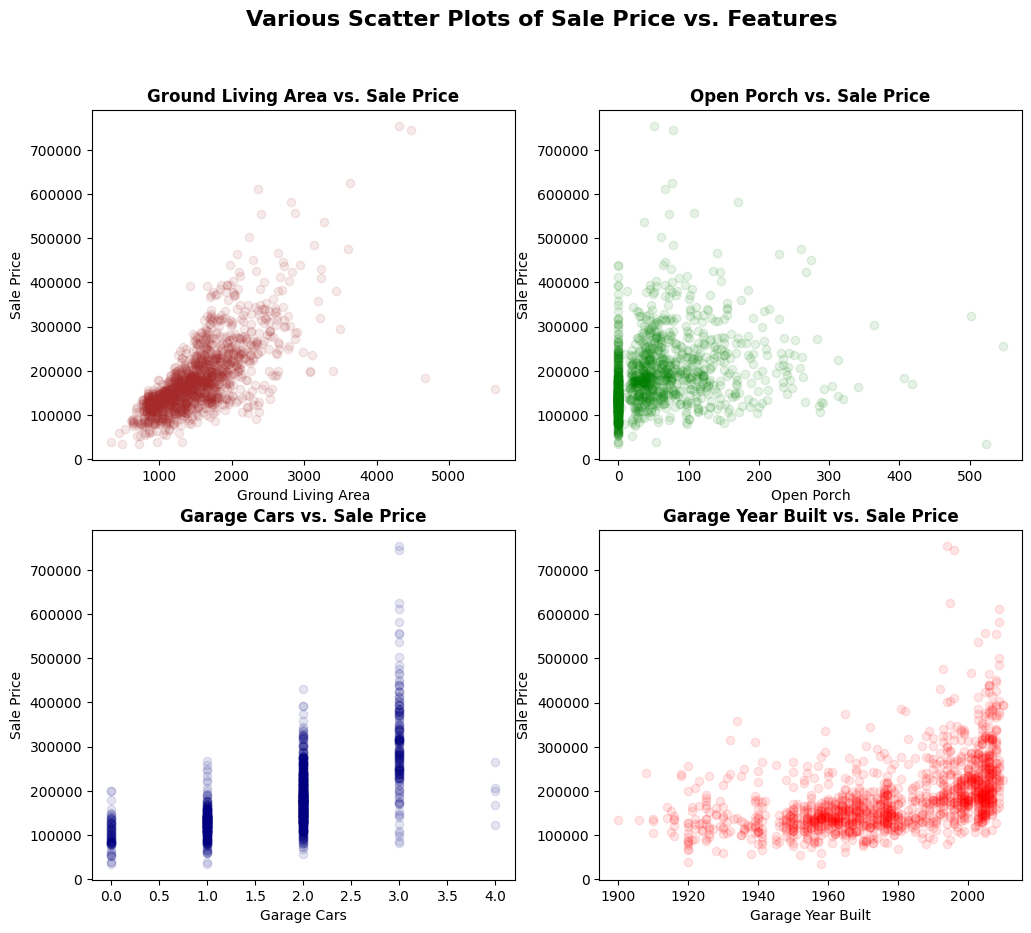

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(x='GrLivArea', y='SalePrice', data=train_csv, alpha=0.1, color='brown')
axs[0, 0].set_title('Ground Living Area vs. Sale Price', weight='bold')
axs[0, 0].set_xlabel('Ground Living Area')
axs[0, 0].set_ylabel('Sale Price')

axs[0, 1].scatter(x='OpenPorchSF', y='SalePrice', data=train_csv, alpha=0.1, color='g')
axs[0, 1].set_title('Open Porch vs. Sale Price', weight='bold')
axs[0, 1].set_xlabel('Open Porch')
axs[0, 1].set_ylabel('Sale Price')

axs[1, 0].scatter(x='GarageCars', y='SalePrice', data=train_csv, alpha=0.1, color='navy')
axs[1, 0].set_title('Garage Cars vs. Sale Price', weight='bold')
axs[1, 0].set_xlabel('Garage Cars')
axs[1, 0].set_ylabel('Sale Price')

axs[1, 1].scatter(x='GarageYrBlt', y='SalePrice', data=train_csv, alpha=0.1, color='r')
axs[1, 1].set_title('Garage Year Built vs. Sale Price', weight='bold')
axs[1, 1].set_xlabel('Garage Year Built')
axs[1, 1].set_ylabel('Sale Price')
plt.suptitle('Various Scatter Plots of Sale Price vs. Features', fontsize=16, weight='bold')

plt.show();

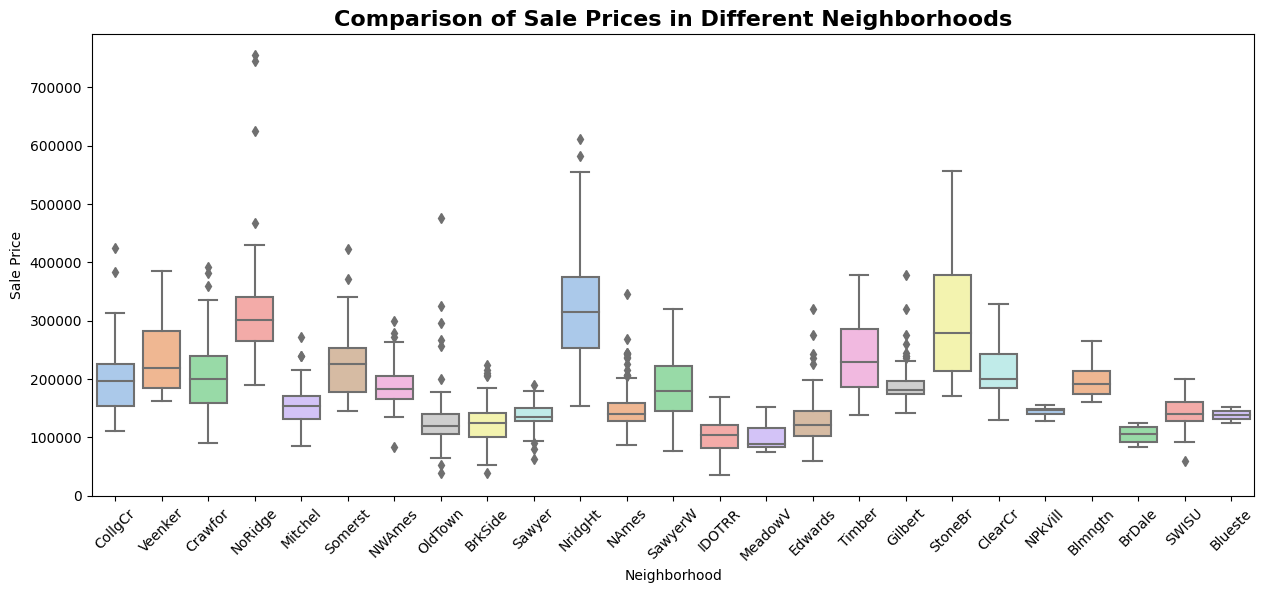

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_csv, palette='pastel')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.title('Comparison of Sale Prices in Different Neighborhoods', weight='bold', fontsize=16)
plt.xticks(rotation=45)
plt.show();

In [ ]:
# Columns which contain strings
for label, content in train_csv.items():
  if pd.api.types.is_string_dtype(content):
   print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [ ]:
# Columns which contain strings
for label, content in test_csv.items():
  if pd.api.types.is_string_dtype(content):
   print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [ ]:
# Turning all string values in category values
for label, content in train_csv.items():
  if pd.api.types.is_string_dtype(content):
    train_csv[label] = content.astype('category').cat.as_ordered()

In [ ]:
# Turning all string values in category values
for label, content in test_csv.items():
  if pd.api.types.is_string_dtype(content):
    test_csv[label] = content.astype('category').cat.as_ordered()

In [ ]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          91 non-null     category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

###Filling numerical values first

In [ ]:
# For train csv
for label, content in train_csv.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      train_csv[label] = content.fillna(content.median())

In [ ]:
# For test csv
for label, content in test_csv.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      test_csv[label] = content.fillna(content.median())

In [ ]:
# Checking if there is null value
for label, content in train_csv.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)
for label, content in test_csv.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

###Filling and turning categorical variables to numbers

In [ ]:
for label, content in train_csv.items():
  if not pd.api.types.is_numeric_dtype(content):
    train_csv[label] = pd.Categorical(content).codes+1

In [ ]:
for label, content in test_csv.items():
  if not pd.api.types.is_numeric_dtype(content):
    test_csv[label] = pd.Categorical(content).codes+1

In [ ]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int8   
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int8   
 5   Alley          1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int8   
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int8   
 5   Alley          1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [ ]:
train_csv.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

#**Machine Learning Model**
- `Random Forest Regressor`
- `CATBOOST Method`
- `XGBRegressor method`
- `Decision Tree method`

**Random Forest Regressor**

In [ ]:
X_train = train_csv.drop('SalePrice', axis=1)
y_train = train_csv['SalePrice']
X_test = test_csv

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_test_pred = model.predict(X_test)

**CATBOOST Method**

In [ ]:
X_train_df = train_csv.iloc[:,:-1]
y_train_df = train_csv['SalePrice']

In [ ]:
preliminary_model = CatBoostRegressor(depth=7, iterations=70, l2_leaf_reg=5, learning_rate=0.1)

In [ ]:
%%time
preliminary_model.fit(X_train_df, y_train_df)

0:	learn: 74638.9003650	total: 147ms	remaining: 10.1s
1:	learn: 70162.8881099	total: 200ms	remaining: 6.81s
2:	learn: 66018.0834962	total: 257ms	remaining: 5.73s
3:	learn: 62341.4026906	total: 303ms	remaining: 4.99s
4:	learn: 59349.6664394	total: 335ms	remaining: 4.36s
5:	learn: 56517.5042414	total: 365ms	remaining: 3.89s
6:	learn: 53564.4302513	total: 410ms	remaining: 3.69s
7:	learn: 50872.3891238	total: 448ms	remaining: 3.47s
8:	learn: 48858.2562840	total: 481ms	remaining: 3.26s
9:	learn: 46854.3506387	total: 512ms	remaining: 3.07s
10:	learn: 45207.8491747	total: 544ms	remaining: 2.92s
11:	learn: 43892.8745900	total: 579ms	remaining: 2.8s
12:	learn: 42299.4108145	total: 608ms	remaining: 2.66s
13:	learn: 40999.4783703	total: 643ms	remaining: 2.57s
14:	learn: 39798.1402785	total: 688ms	remaining: 2.52s
15:	learn: 38543.0804568	total: 719ms	remaining: 2.42s
16:	learn: 37270.5010308	total: 763ms	remaining: 2.38s
17:	learn: 36026.6653440	total: 802ms	remaining: 2.31s
18:	learn: 35031.9922

In [ ]:
preliminary_model.predict(X_train_df)

array([204242.89631802, 168964.01580344, 211190.81169006, ...,
       235627.77818291, 134745.91247622, 141391.81181879])

In [ ]:
score = preliminary_model.score(X_train_df, y_train_df)
print(f'Estimation of determination accuracy: {score*100:.2f}%')

Estimation of determination accuracy: 94.53%


In [ ]:
X_test_df = test_csv

In [ ]:
pre_test_df = preliminary_model.predict(X_test_df)
pre_test_df

array([122109.56061203, 160382.47772265, 177315.06194534, ...,
       167138.84417854, 116906.0718164 , 231167.64440448])

In [ ]:
test_csv['SalePrice'] = pre_test_df

In [ ]:
test_csv.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,3,80.0,11622,2,0,4,4,1,5,...,0,0,3,0,0,6,2010,9,5,122109.560612
1462,20,4,81.0,14267,2,0,1,4,1,1,...,0,0,0,1,12500,6,2010,9,5,160382.477723
1463,60,4,74.0,13830,2,0,1,4,1,5,...,0,0,3,0,0,3,2010,9,5,177315.061945
1464,60,4,78.0,9978,2,0,1,4,1,5,...,0,0,0,0,0,6,2010,9,5,186527.268214
1465,120,4,43.0,5005,2,0,1,2,1,5,...,0,0,0,0,0,1,2010,9,5,192365.260460


**XGBRegressor method**

In [ ]:
X_train_df_2 = train_csv.iloc[:,:-1]
y_train_df_2 = train_csv['SalePrice']

In [ ]:
preliminary_model_2 = XGB.XGBRegressor(colsample_bytree=0.6, learning_rate=0.1,
                                       max_depth=4, n_estimators=200, reg_alpha = 0.0001,
                                       subsample=0.7, objective='reg:linear', nthread=-1,
                                       scale_pos_weight=1, seed=27)

In [ ]:
%%time
preliminary_model_2.fit(X_train_df_2, y_train_df_2)

[11:57:00] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 8.07 s, sys: 25 ms, total: 8.09 s
Wall time: 14.5 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, nthread=-1, num_parallel_tree=None,
             objective='reg:linear', ...)

In [ ]:
preliminary_model_2.predict(X_train_df_2)

array([200016.31, 177455.25, 211923.73, ..., 267513.6 , 145174.48,
       148177.5 ], dtype=float32)

In [ ]:
score_2 = preliminary_model_2.score(X_train_df_2, y_train_df_2)
print(f'Estimation of determination accuracy: {score_2*100:.2f}%')

Estimation of determination accuracy: 98.91%


In [ ]:
X_test_df_2 = test_csv.iloc[:,:-1]

In [ ]:
pre_test_df_2 = preliminary_model_2.predict(X_test_df_2)
pre_test_df_2

array([126629.586, 155700.72 , 177565.14 , ..., 164201.72 , 119012.984,
       222531.11 ], dtype=float32)

In [ ]:
test_csv['SalePrice'] = pre_test_df_2

In [ ]:
test_csv.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,3,80.0,11622,2,0,4,4,1,5,...,0,0,3,0,0,6,2010,9,5,126629.585938
1462,20,4,81.0,14267,2,0,1,4,1,1,...,0,0,0,1,12500,6,2010,9,5,155700.718750
1463,60,4,74.0,13830,2,0,1,4,1,5,...,0,0,3,0,0,3,2010,9,5,177565.140625
1464,60,4,78.0,9978,2,0,1,4,1,5,...,0,0,0,0,0,6,2010,9,5,189144.593750
1465,120,4,43.0,5005,2,0,1,2,1,5,...,0,0,0,0,0,1,2010,9,5,185245.546875


**Decision Tree method**

In [ ]:
X_train_df_3 = train_csv.iloc[:,:-1]
y_train_df_3 = train_csv['SalePrice']

In [ ]:
preliminary_model_3 = tree.DecisionTreeRegressor()
parameters_3 = {
    'criterion': ['mse', 'friedman_mse'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}
grid_CV_3 = GridSearchCV(preliminary_model_3,parameters_3,cv = 5)

In [ ]:
%%time
grid_CV_3.fit(X_train_df_3,y_train_df_3)

CPU times: user 1min 7s, sys: 230 ms, total: 1min 8s
Wall time: 1min 17s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [ ]:
# Get best parameters
best_params = grid_CV_3.best_params_
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 9, 'min_samples_leaf': 8, 'min_samples_split': 4}


In [ ]:
preliminary_model_3 = grid_CV_3.best_estimator_

In [ ]:
score_3 = preliminary_model_3.score(X_train_df_3, y_train_df_3)
print(f'Estimation of determination accuracy: {score_3*100:.2f}%')

Estimation of determination accuracy: 88.73%


##**Conclusion**

In [ ]:
print(f'Precision of CATBOOST method: {score*100:.2f}%')
print(f'Precision of XGBRegressor method: {score_2*100:.2f}%')
print(f'Precision of Decision Tree method: {score_3*100:.2f}%')

Precision of CATBOOST method: 94.53%
Precision of XGBRegressor method: 98.91%
Precision of Decision Tree method: 88.73%


Based on these precision scores, the **XGBRegressor method** appears to be the most accurate in correctly identifying positive cases.